In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('housing-contoh.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data = data.loc[:, ['Latitude', 'Longitude']]
data.head()

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


In [4]:
X = data.values

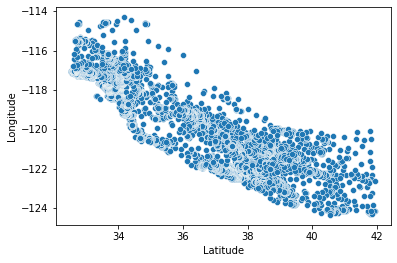

In [5]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [6]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [7]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [8]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

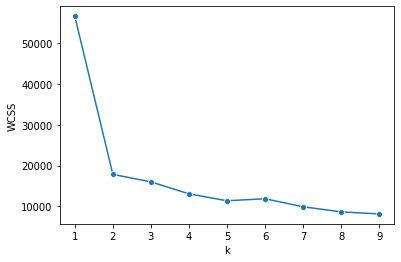

In [9]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [10]:
k = 3
centroids, cluster = kmeans(X, k)

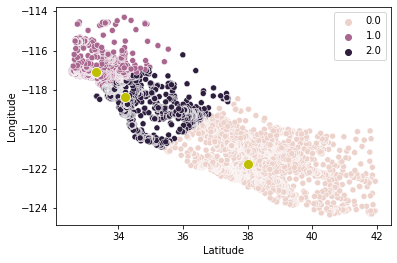

In [11]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()